In [ ]:
## Notebook env: mirtud_env (R kernel)

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## load in latent variable results to caluclate silhouette scores on
path = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization'
ltv_list = list.dirs(path, full.names = F, recursive = F) %>% 
  lapply(function(x) {read.csv(file.path(path, x, paste0(x, '_batch_1_ltv10_scMAVE_mu-matrix.tsv.gz')), sep = '\t', row.names = 1)})

names(ltv_list) = list.dirs(path, full.names = F, recursive = F)

In [ ]:
## caluclate silhouette scores on each mave run in ltv_list


In [3]:
## show umap of mave runs
umap_list = list.dirs(path, full.names = F, recursive = F) %>% 
  lapply(function(x) {read.csv(file.path(path, x, paste0(x, '_batch_1_ltv10_UMAP-OF-MU.tsv.gz')), sep = '\t', row.names = 1)})

names(umap_list) = list.dirs(path, full.names = F, recursive = F)

In [9]:
head(umap_list[[1]])

,UMAP1,UMAP2,guide
,<dbl>,<dbl>,<chr>
tRF_1:ATCCATTCAAACACCT-1,11.339309,3.2592003,tRNA-Asn-GTT-8-1.2t
tRF_1:CTCAAGAGTCAACATC-1,9.814381,5.0311150,tRNA-Lys-TTT-7-1.2t
tRF_1:ACCTACCCAGCATCTA-1,10.786395,2.8658874,tRNA-Arg-TCG-2-1.2t
tRF_3:CTGCAGGCAACACGTT-1,9.031879,2.6586688,tRF_Arg_CCT_2
tRF_2:AGATGAAGTCGTGCCA-1,10.537705,0.2270984,tRF_Leu_TAG_2
tRF_1:AGCGCCACACGAGGTA-1,8.090630,2.1637774,tRNA-Arg-TCT-(2)3-1.2t


In [8]:
UMAP_output = umap_list

In [10]:
UMAP_output_2dims = list()
for (j in 1:length(UMAP_output)){
    guides = unique(UMAP_output[[j]]$guide)
    tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output[[j]]), ncol = length(guides)))
    colnames(tmp_df) = guides
    for (i in 1:length(guides)){
        guide_cells = UMAP_output[[j]]$guide == guides[i]
        vec = UMAP_output[[j]]$guide
        vec[guide_cells] = 'Guide'
        vec[!guide_cells] = 'N/A'
        tmp_df[,i] <- vec
    }
    UMAP_output_2dims[[j]] = cbind(UMAP_output[[j]], tmp_df)
}


In [14]:
head(UMAP_output_2dims[[1]])

,UMAP1,UMAP2,guide,tRNA-Asn-GTT-8-1.2t,tRNA-Lys-TTT-7-1.2t,tRNA-Arg-TCG-2-1.2t,tRF_Arg_CCT_2,tRF_Leu_TAG_2,tRNA-Arg-TCT-(2)3-1.2t,tRF_Gln_CTG_2,⋯,tRNA-Gly-GCC-5-1.2t,tRNA-Leu-CAA-(2)1-1.2t,tRNA-Ala-AGC-4-1.2t,tRNA-Cys-GCA-4-1.2t,tRNA-Gly-CCC-(2)2-1.2t,tRNA-Thr-CGT-3-1.lh,tRNA-Met-CAT-(2)3-1.2t,tRNA-Ala-TGC-6-1.2t,tRNA-Pro-TGG-(5)3-1.2t,tRNA-Cys-GCA-4-1.rh
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
tRF_1:ATCCATTCAAACACCT-1,11.339309,3.2592003,tRNA-Asn-GTT-8-1.2t,Guide,N/A,N/A,N/A,N/A,N/A,N/A,⋯,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
tRF_1:CTCAAGAGTCAACATC-1,9.814381,5.0311150,tRNA-Lys-TTT-7-1.2t,N/A,Guide,N/A,N/A,N/A,N/A,N/A,⋯,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
tRF_1:ACCTACCCAGCATCTA-1,10.786395,2.8658874,tRNA-Arg-TCG-2-1.2t,N/A,N/A,Guide,N/A,N/A,N/A,N/A,⋯,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
tRF_3:CTGCAGGCAACACGTT-1,9.031879,2.6586688,tRF_Arg_CCT_2,N/A,N/A,N/A,Guide,N/A,N/A,N/A,⋯,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
tRF_2:AGATGAAGTCGTGCCA-1,10.537705,0.2270984,tRF_Leu_TAG_2,N/A,N/A,N/A,N/A,Guide,N/A,N/A,⋯,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
tRF_1:AGCGCCACACGAGGTA-1,8.090630,2.1637774,tRNA-Arg-TCT-(2)3-1.2t,N/A,N/A,N/A,N/A,N/A,Guide,N/A,⋯,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [40]:
plts2 <- list()
for (j in 1:length(UMAP_output_2dims)){
    plts2[[j]] <- list()
    for (i in 1:length(guides)){
        tmp <- UMAP_output_2dims[[j]][,c(1,2,(i+3))]
        colnames(tmp)[3] <- 'Type'
        tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
        if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        } else {
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        }
    }
}

In [42]:
library(ggpubr)
umap_plts <- list()
for (j in 1:length(plts2)){
    umap_plts[[j]] <- rep(list('empty'), ceiling(length(plts2[[j]])/25))
    for (i in 1:ceiling(length(plts2[[j]])/25)){
        umap_plts[[j]][[i]] <- ggarrange(plotlist = plts2[[j]][(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
    }
}


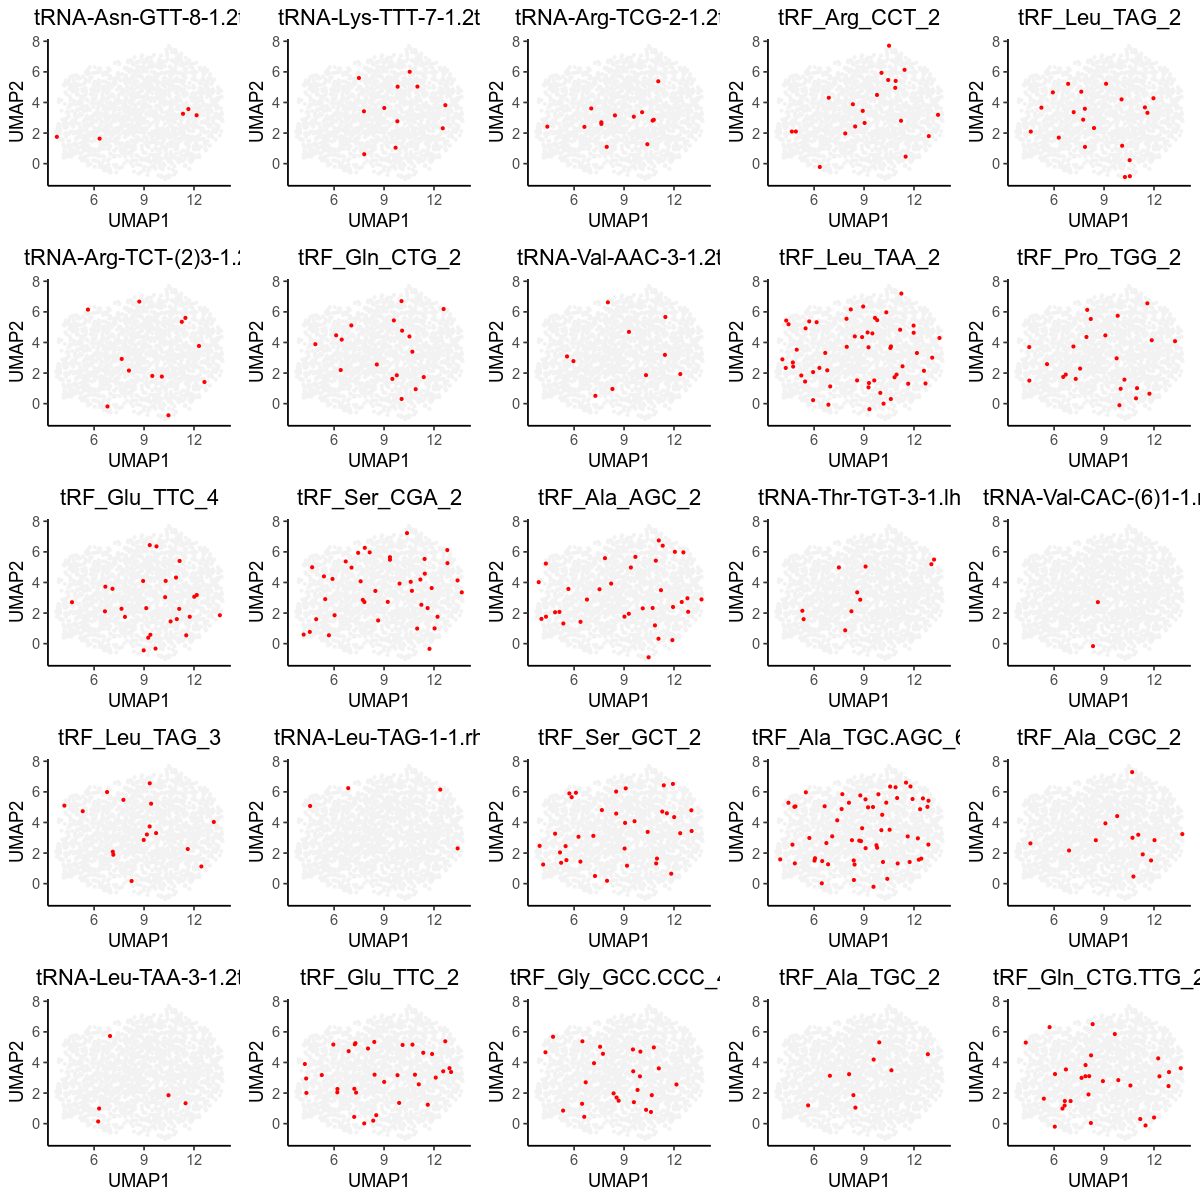

In [43]:
options(repr.plot.width=10, repr.plot.height=10)
umap_plts[[1]][[1]]

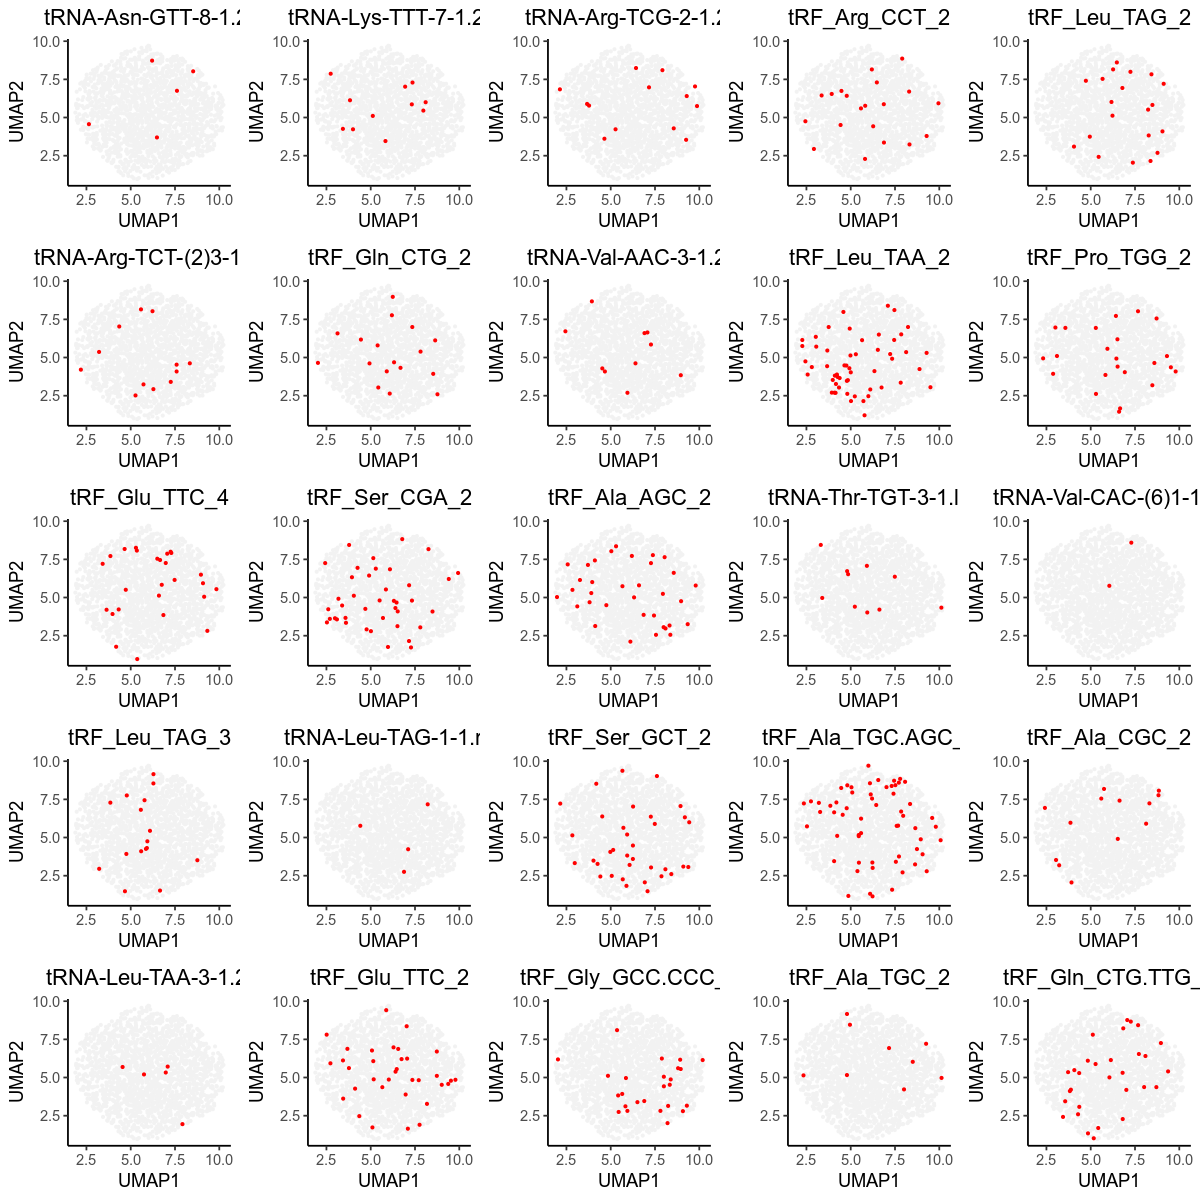

In [44]:
umap_plts[[2]][[1]]

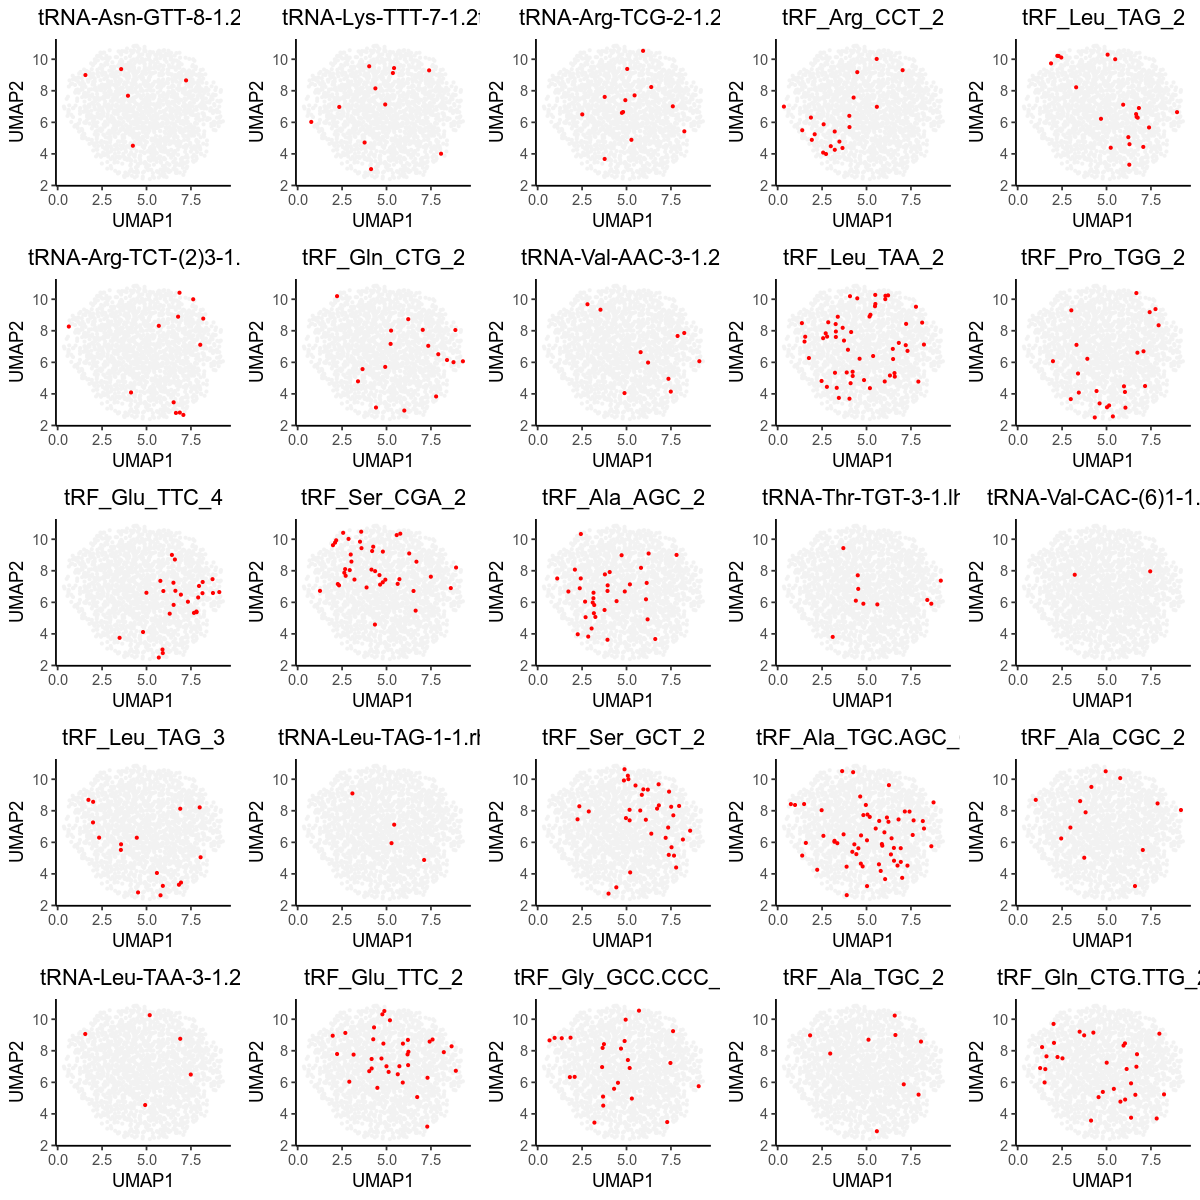

In [45]:
umap_plts[[3]][[1]]

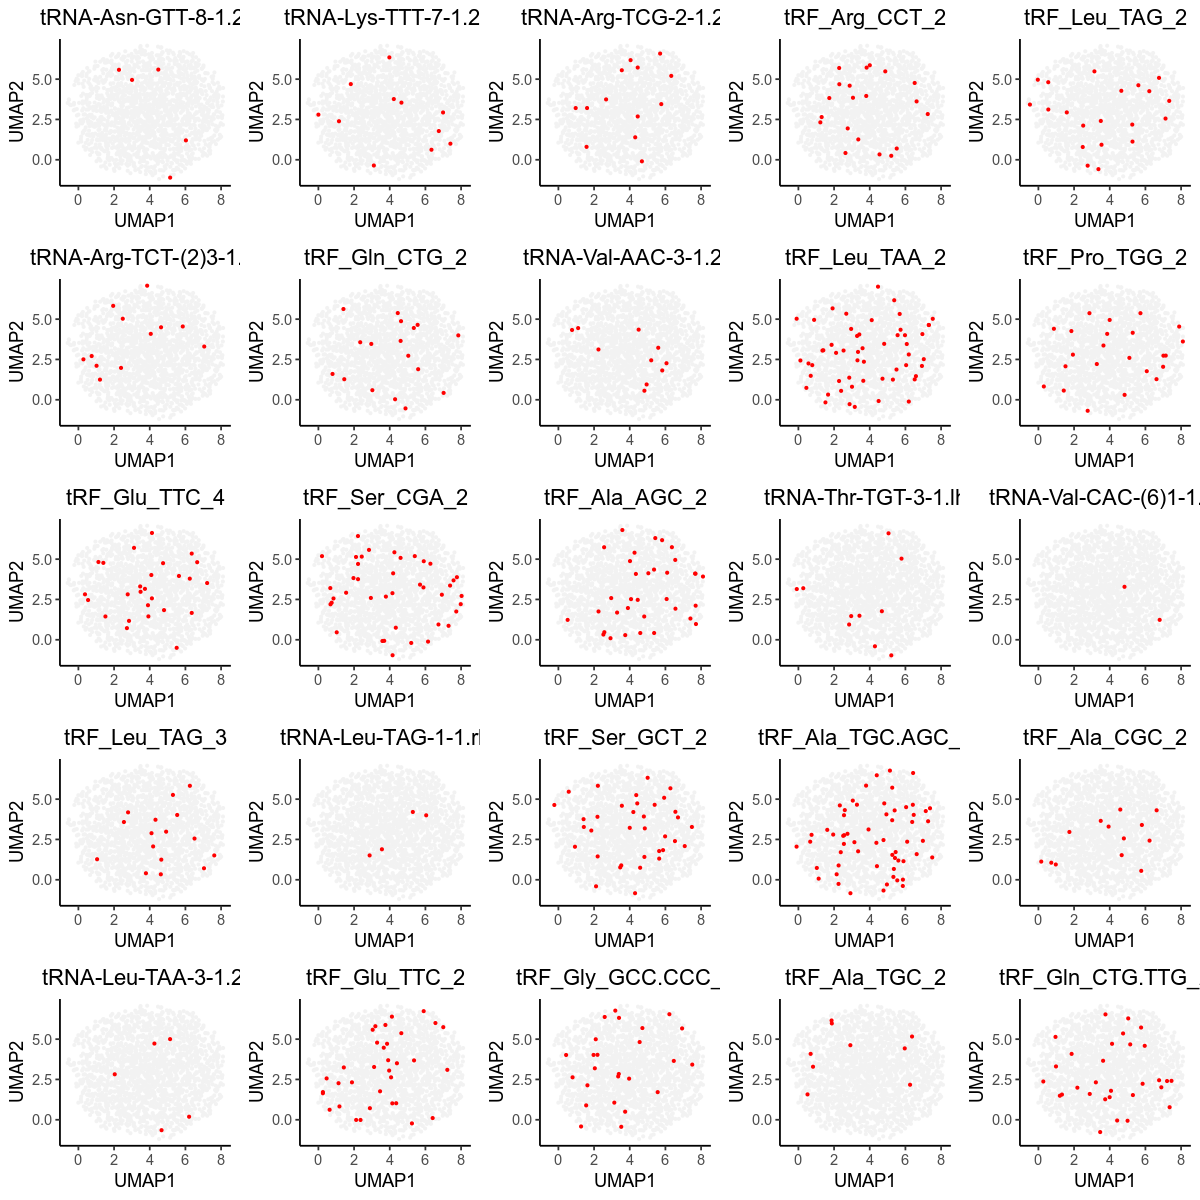

In [46]:
umap_plts[[4]][[1]]

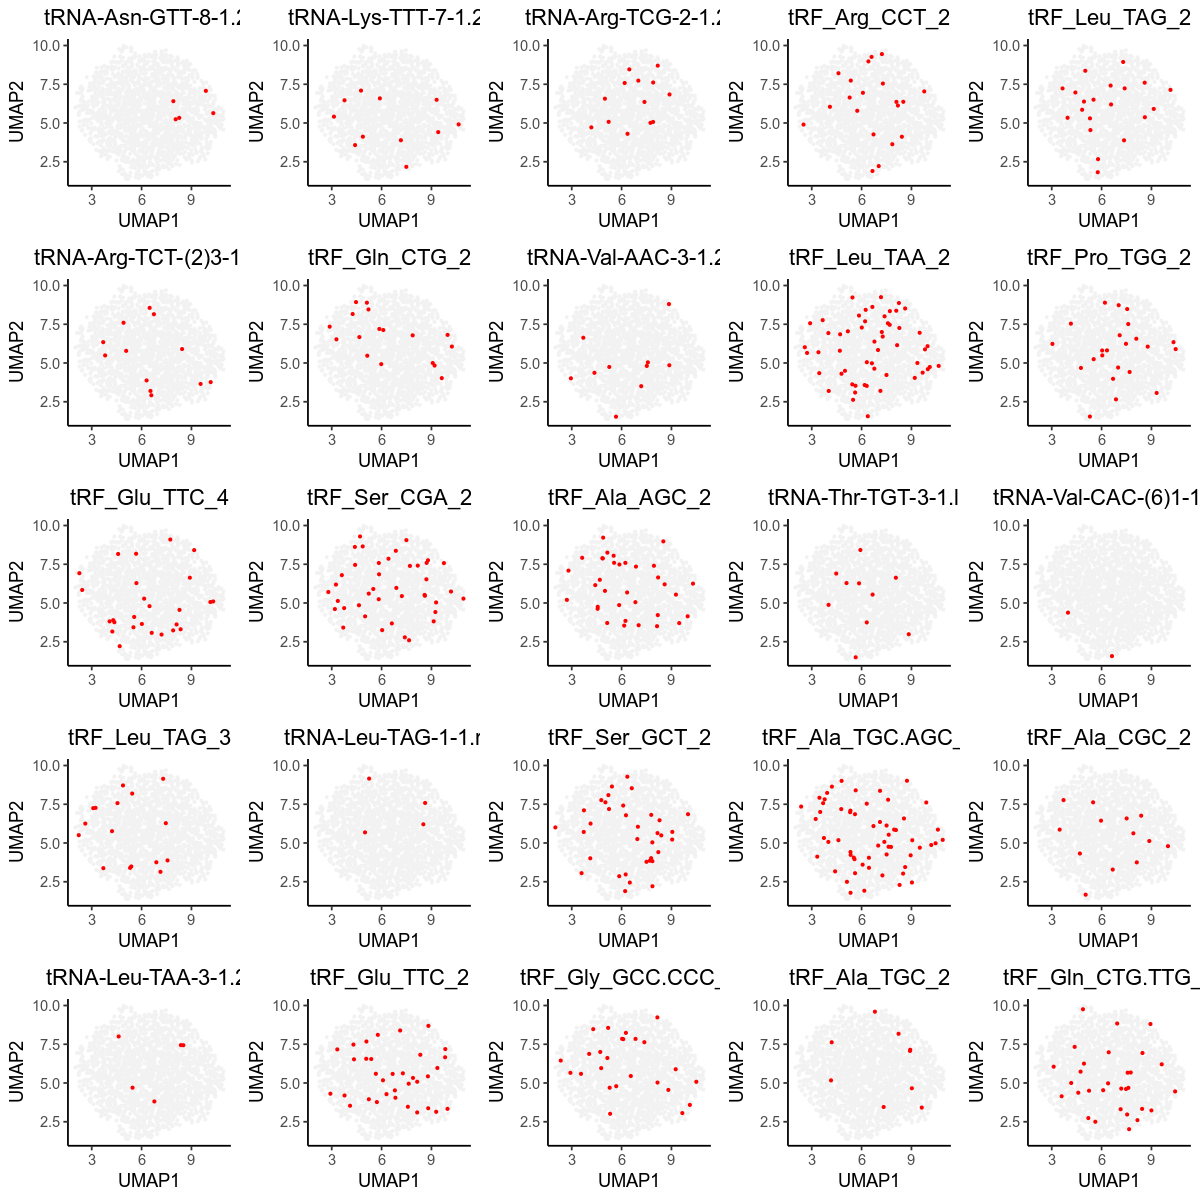

In [47]:
umap_plts[[5]][[1]]

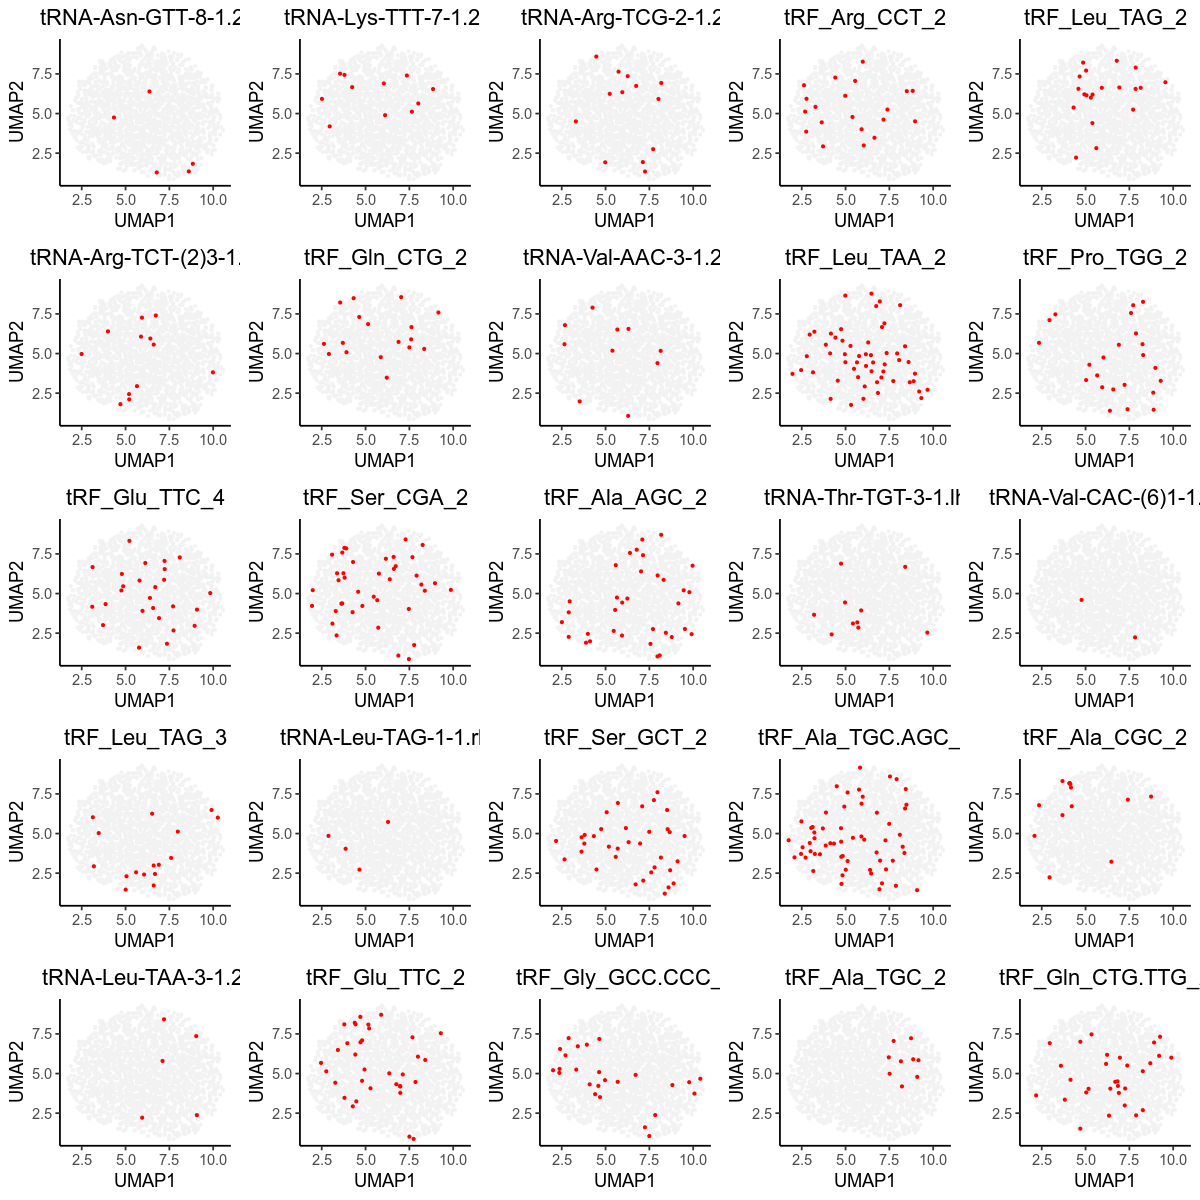

In [49]:
umap_plts[[6]][[1]]

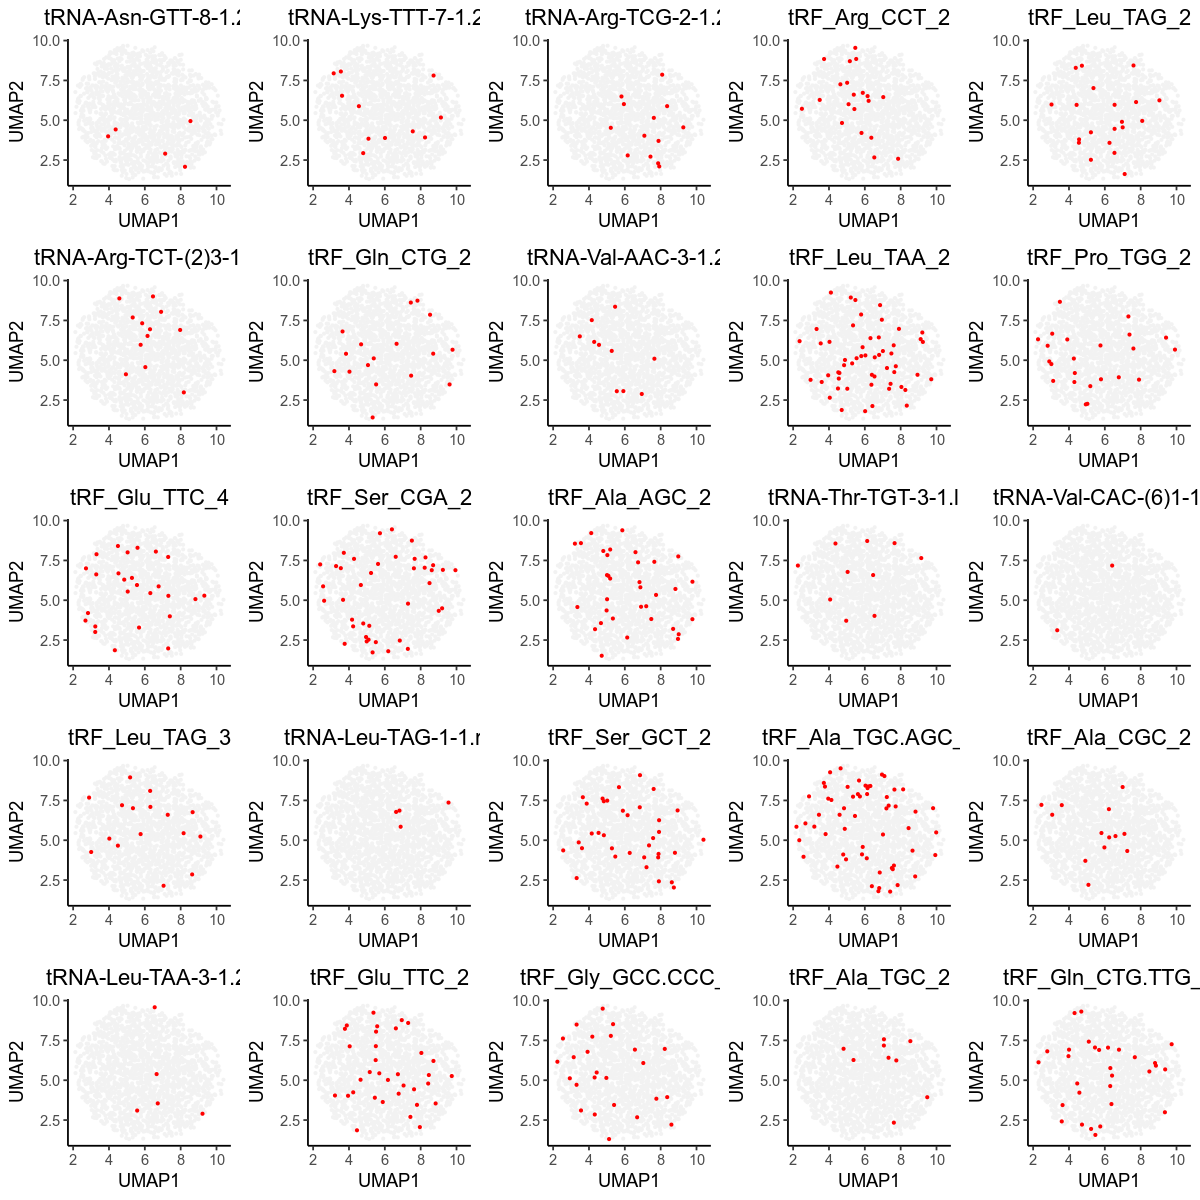

In [50]:
umap_plts[[7]][[1]]

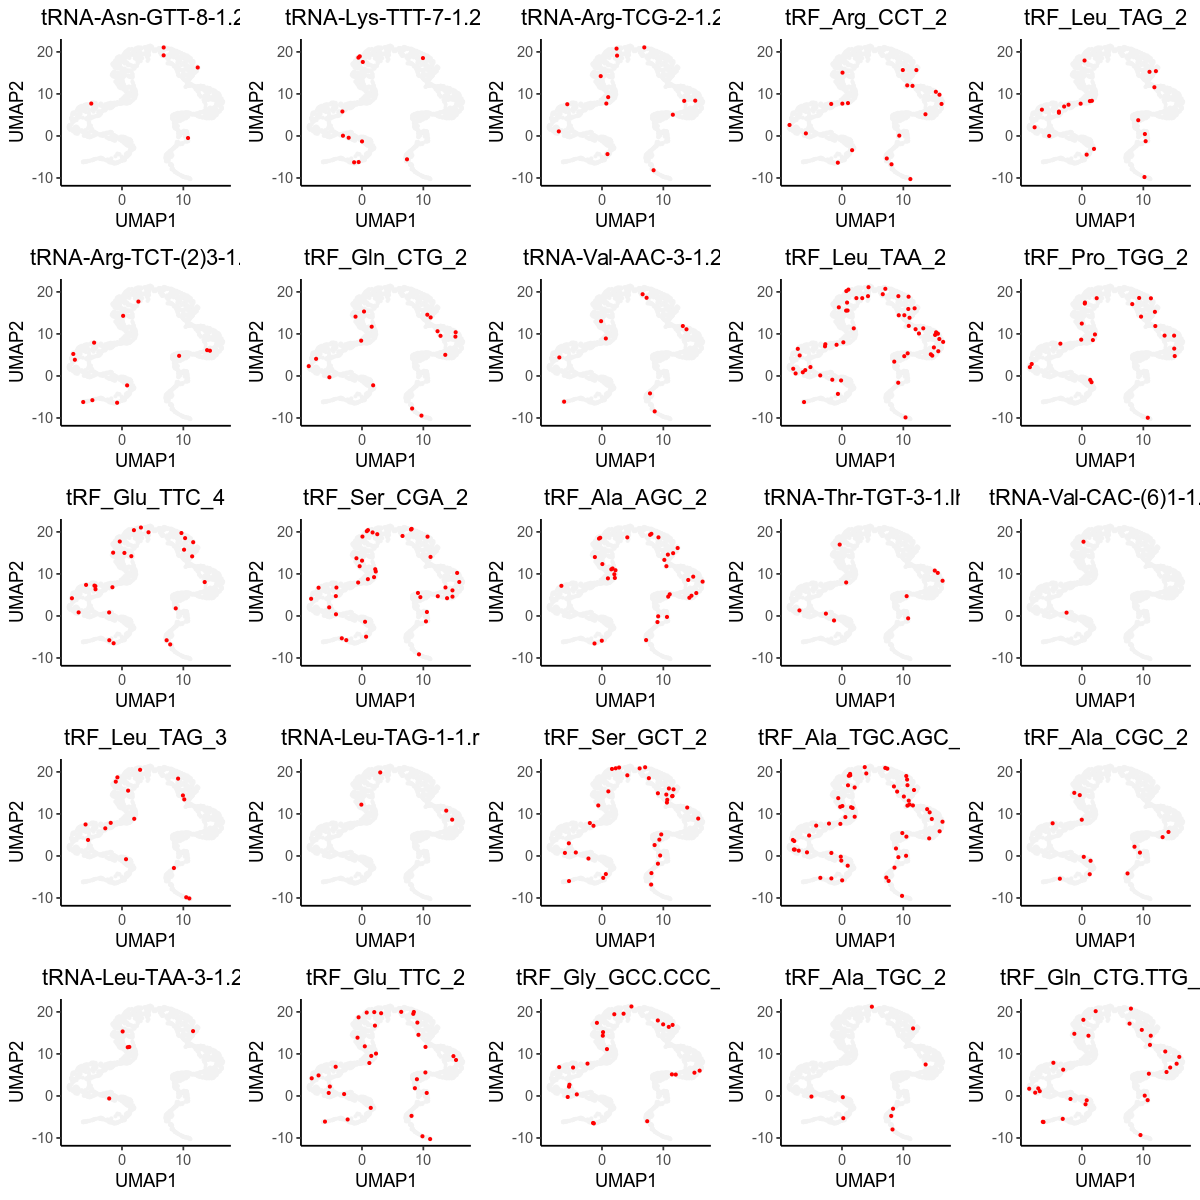

In [51]:
umap_plts[[8]][[1]]